# Question 1

In [8]:
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees

import plotly.express as px

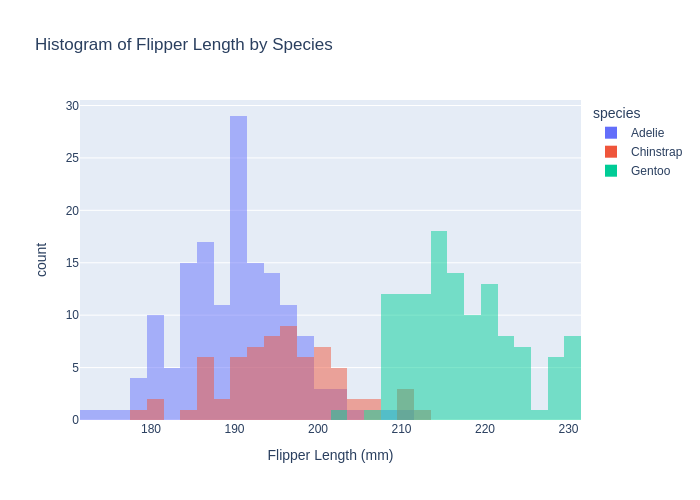

In [9]:
#intial histogram without edits
fig = px.histogram(pingees, x="flipper_length_mm", color="species", 
                   title="Histogram of Flipper Length by Species",
                   labels={"flipper_length_mm": "Flipper Length (mm)"},
                   nbins=30,
                   barmode='overlay')

fig.show(renderer="png")

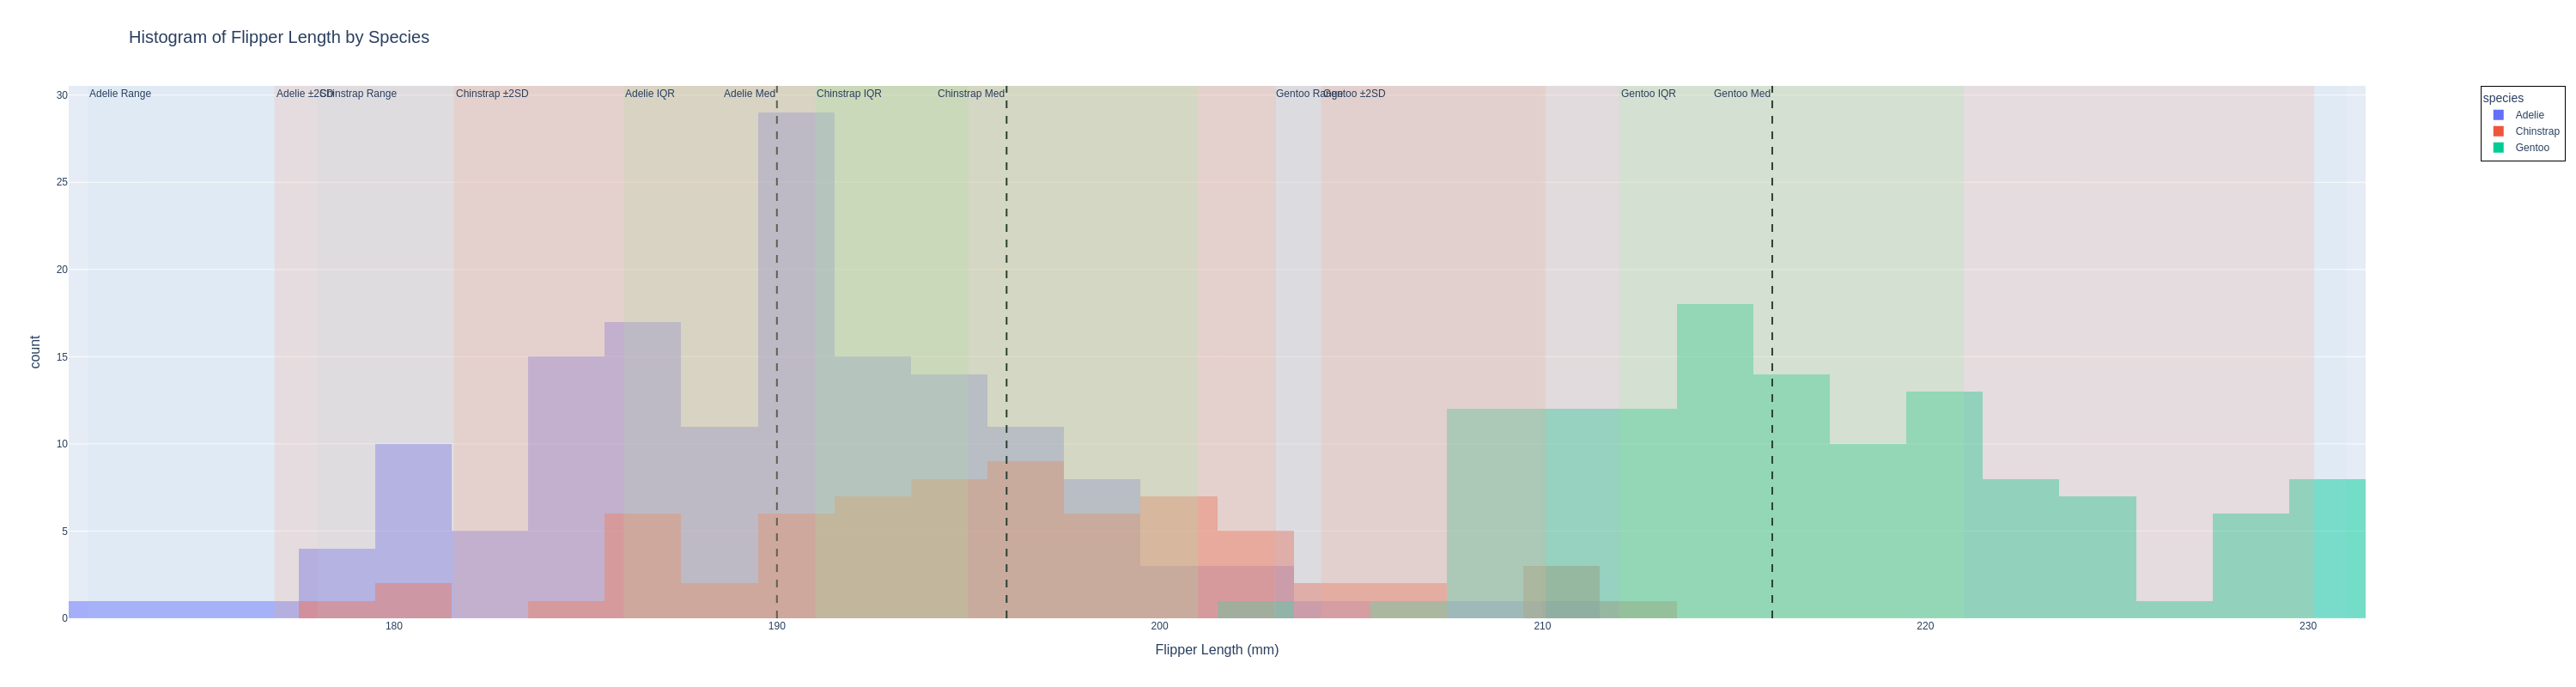

In [10]:
# Create the histogram
fig = px.histogram(pingees, x="flipper_length_mm", color="species", 
                   title="Histogram of Flipper Length by Species",
                   labels={"flipper_length_mm": "Flipper Length (mm)"},
                   nbins=30,
                   barmode='overlay')

# Calculate statistics for each species
species_stats = pingees.groupby('species')['flipper_length_mm'].agg(
    mean='mean', median='median', min_val='min', max_val='max', 
    std_dev='std', q1=lambda x: x.quantile(0.25), q3=lambda x: x.quantile(0.75)
).reset_index()

# Add statistical markers for each species
for _, row in species_stats.iterrows():
    species = row['species']
    
    # Mean ± 2 standard deviations (abbreviated to ±2SD)
    mean = row['mean']
    std_dev = row['std_dev']
    fig.add_vrect(x0=mean - 2*std_dev, x1=mean + 2*std_dev, 
                  line_width=0, fillcolor='LightSalmon', opacity=0.2, 
                  annotation_text=f'{species} ±2SD', annotation_position="top left")

    # Median (abbreviated to Med)
    median = row['median']
    fig.add_vline(x=median, line=dict(color='Black', width=2, dash="dash"),
                  annotation_text=f'{species} Med', annotation_position="top left")
    
    # IQR (Interquartile Range)
    q1 = row['q1']
    q3 = row['q3']
    fig.add_vrect(x0=q1, x1=q3, line_width=0, fillcolor='LightGreen', opacity=0.2, 
                  annotation_text=f'{species} IQR', annotation_position="top left")

    # Min-Max range
    min_val = row['min_val']
    max_val = row['max_val']
    fig.add_vrect(x0=min_val, x1=max_val, line_width=0, fillcolor='LightBlue', opacity=0.1, 
                  annotation_text=f'{species} Range', annotation_position="top left")

# Update layout to enlarge the graph
fig.update_layout(
    width=3000,  # Adjust width
    height=800,  # Adjust height
    title_font_size=20,  # Increase title font size
    xaxis_title_font_size=16,  # Increase x-axis label font size
    yaxis_title_font_size=16,  # Increase y-axis label font size
    legend_title_font_size=14,  # Increase legend font size
    legend=dict(x=1.05, y=1, traceorder="normal", bgcolor='rgba(0,0,0,0)',
                bordercolor='black', borderwidth=1),
)

# Display the figure
fig.show(renderer="png")

# Question 2

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv'
penguins = pd.read_csv(url)

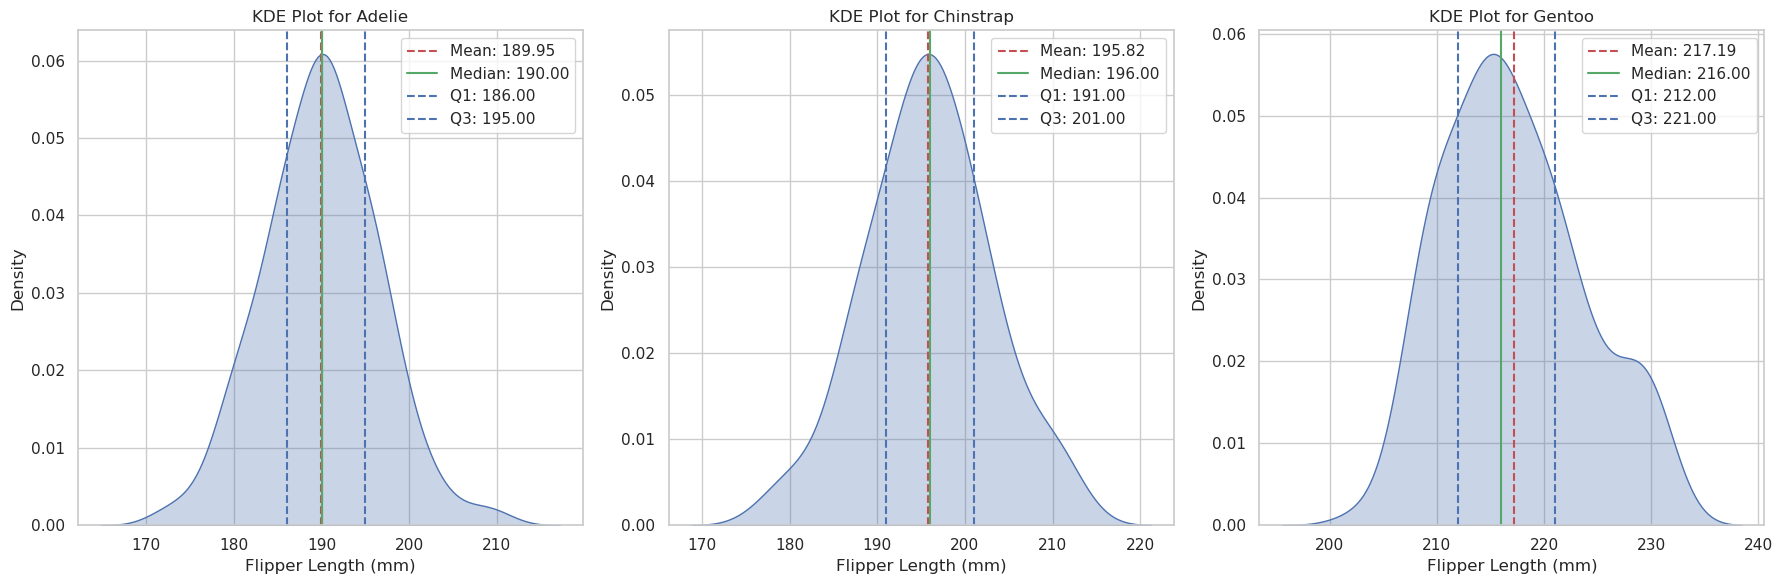

In [12]:
# Create subplots (3 columns, 1 row)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Loop through each species and plot its KDE
for ax, species in zip(axes, penguins['species'].unique()):
    # Filter data for the current species
    data = penguins[penguins['species'] == species]['flipper_length_mm'].dropna()
    
    # Plot the KDE
    sns.kdeplot(data, fill=True, alpha=0.3, ax=ax)
    
    # Calculate summary statistics
    mean = data.mean()
    median = data.median()
    q1 = data.quantile(0.25)  # First quartile
    q3 = data.quantile(0.75)  # Third quartile
    
    # Add vertical lines for mean, median, and quartiles
    ax.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
    ax.axvline(q1, color='b', linestyle='--', label=f'Q1: {q1:.2f}')
    ax.axvline(q3, color='b', linestyle='--', label=f'Q3: {q3:.2f}')
    
    # Set title and labels
    ax.set_title(f"KDE Plot for {species}")
    ax.set_xlabel("Flipper Length (mm)")
    ax.set_ylabel("Density")
    
    # Add a legend
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Question 3

After my discussions with a chatbot I can say my preference is to use the histogram plot, even if most times, deciding what plot to use to visualize data depends on the situation. I found histograms to be my preference because of their utility in visualizing any data set regardless of how deep or what the purpose of the analysis is. Furthermore its compatibility with box plots make it more attractive as I can remove one of the cons of not being able to see or visualize the median, mean, and IQR when using a histogram. Why I would prefer it over KDE's when they are a more visually appealing form of a histogram, is that with a histogram you can see properly how the data is distributed. Since it is a discrete function, you can precisely and actively figure out the exact number for a bin gaining more insight on why the data is the way it is.

# Question 4

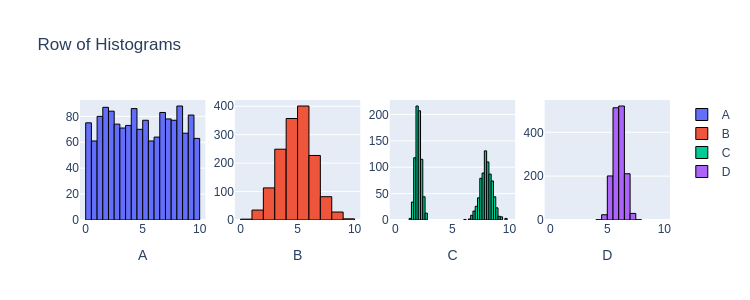

In [14]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer = 'png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

**4.1**
I would say set A and C have very similar means and variances. For set A, since all of the data points follow a normal distribion, the mean is in the middle of the plot, around 5. Plus the variance goes from 0-10 as a majority of the data is distributed across this range. For the second one, it is a bit more tricky. But since it has 2 major peaks, we can analyze both of these in detail to show that the mean is infact 5 or close to 5. For the first range, between 0 and 5, despite having very large peaks, they are not as frequent as the ones in the range of 5-10. This means we can assume that both sides have an equal amount of data points, meaning if you were to sum and then divide, you would find that the mean is 5. For variance, even if not many values exist at 5 for set C, we can see that the spread of the values go from 0-5 and then 5-10 equally, very similar to how the spread of data is for set A.


**4.2**
I would say data set B and D have a similar mean but different variance. This is because both have their peak around or close to 5, where the values of mean and median are (because it is similar to a normal distribution) however dataset B has values all the way from 0 to 10 while set D only has till around 4 and 7/8.

**4.3**
I would say that none of the sets have similar variances and different means. As the 3 data sets with similar variances have the same means and the one with a different variance (data set D) also has a different mean, leading to no overlap.

**4.4**
I would set data set A and D have different means and variance. For data set A the mean is close to 5 but not 5, as data set A has all data values very equally spread out, making its mean closer to 5 than data set D. Furthermore the variance is wildly different, as for dataset D it is very close around the peak, while for data set A it spreads everywhere from 0-10 with each bin having a similar amount of points.

Chatbot logs for Q1-4: https://chatgpt.com/share/66f36116-92e8-8007-834c-bf7e0a79cbd2

# Question 5

__Explanation about definitions:__
A right skewed distribution means a majority of the data is on the left hand side of the plot, with a few outliers trailing on the right hand side. A left skewed distribution means a majority of the data is on the right, with a few outliers trailing on the left side.

When discussing the relationship about mean and median, each distribution has its own case. If we were to start with the right skewed distribution, the mean is usually greater than the median as the outliers on the right hand side usually drag up the mean. For a left skewed distribution, the mean is often smaller than the median as the outliers on the left hand side of the plot often drag the mean under the median. These outliers rarely have any effect on the median itself.

__Explanation with code:__
The code produces 2 data sets using some functions from the scipy module to great one that is right skewed and another that is left skewed.

First we start with importing the libraries.

In [3]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

Then we create the first data set and calculate its average and median.

In [5]:
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

print(sample1.mean())
print(np.quantile(sample1, [0.5])) # median

4.096293982137873
[3.46865117]


Running the plot shows us that this is in fact a right skewed plot, as the mean is greater than the median.

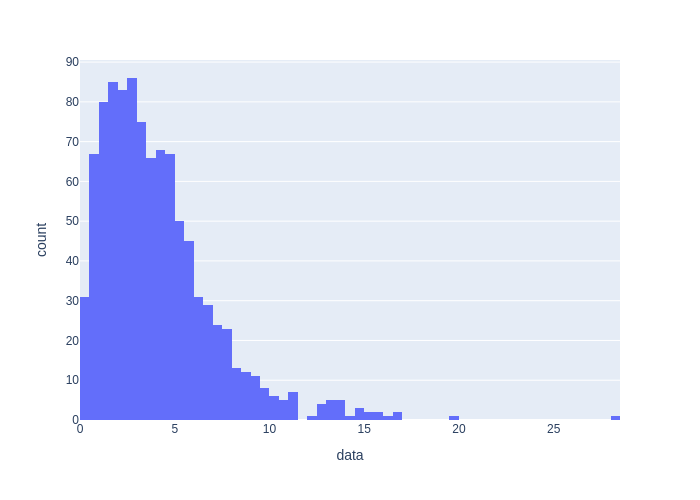

In [11]:
fig1.show(renderer = 'png')

Now we can check for the second data set created.

In [9]:
sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")

print(sample2.mean())
print(np.quantile(sample2, [0.5])) # median

-4.132452414453227
[-3.5926531]


Here we can see that the median is greater than the mean, this implies that this will be a left skewed plot.

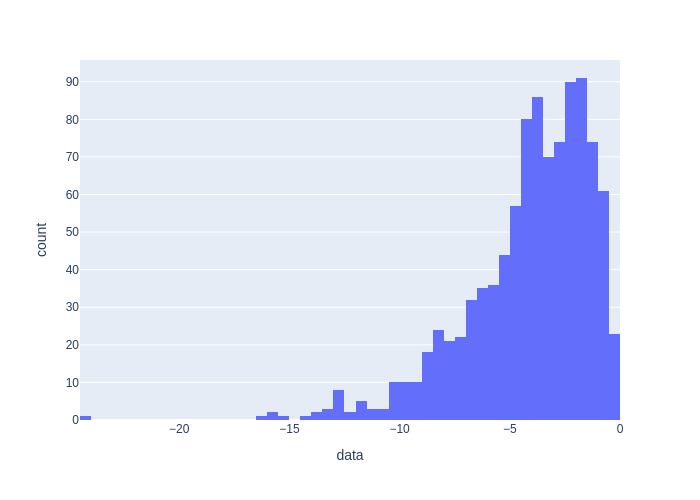

In [10]:
fig2.show(renderer = 'png')

Therefore, showing with the code, a right skewed graph will always have a majority of its data on the left hand and with its mean typically being larger than the median. While the left skewed graph will have a majority of its data on the right hand side and its mean typically being smaller than the median. 

# Question 6

In [41]:
import pandas as pd
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
df # df.columns

,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [42]:
df.isnull().sum() # to gain an idea of how many missing values I have

restaurant id                      0
category id                        0
item id                            0
serving size (oz)                355
calories                           0
calories from fat                490
total fat (g)                      0
total fat (% daily value)        490
saturated fat (g)                113
saturated fat (% daily value)    490
trans fat (g)                    113
cholesterol (mg)                 113
cholesterol (% daily value)      490
sodium (mg)                      113
sodium (% daily value)           490
carbohydrates (g)                  0
carbohydrates (% daily value)    490
dietary fiber (g)                  0
dietary fiber (% daily value)    490
sugars (g)                       113
protein (g)                        0
vitamin a (% daily value)        113
vitamin c (% daily value)        113
calcium (% daily value)          113
iron (% daily value)             113
dtype: int64

In [43]:
del df['calories from fat']
del df['serving size (oz)']
del df['total fat (% daily value)']
del df['saturated fat (% daily value)']
del df['cholesterol (% daily value)']
del df['carbohydrates (% daily value)']
del df['dietary fiber (% daily value)']
del df['sodium (% daily value)']

In [44]:
df = df.dropna()

In [45]:
df.isnull().sum() #to check again to make sure no missing values exist and to get a better idea of what data to work with

restaurant id                0
category id                  0
item id                      0
calories                     0
total fat (g)                0
saturated fat (g)            0
trans fat (g)                0
cholesterol (mg)             0
sodium (mg)                  0
carbohydrates (g)            0
dietary fiber (g)            0
sugars (g)                   0
protein (g)                  0
vitamin a (% daily value)    0
vitamin c (% daily value)    0
calcium (% daily value)      0
iron (% daily value)         0
dtype: int64

**First Interesting Aspect of Data:**

Let us plot out the amount of sodium in these products. Before we start, we should calculate the mean, median, and mode of this column to see what we are dealing with.

In [47]:
print("Mean: ", df['sodium (mg)'].mean())
print("Median: ", df['sodium (mg)'].median())
print("Mode: ", df['sodium (mg)'].mode())

Mean:  361.5541601255887
Median:  80.0
Mode:  0    0.0
Name: sodium (mg), dtype: float64


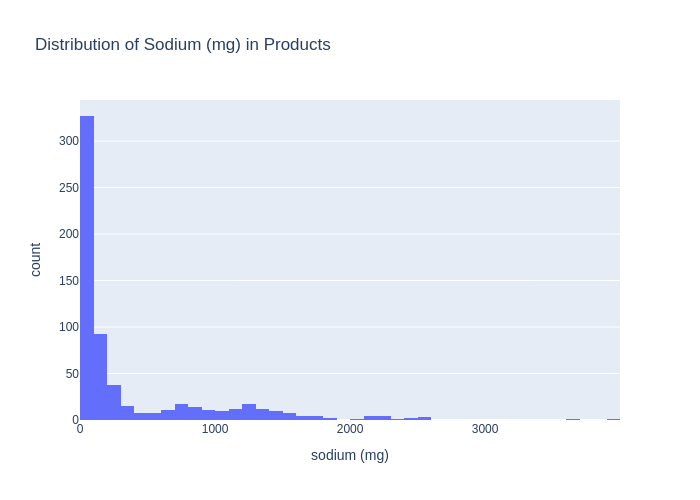

In [50]:
fig = px.histogram(df, x='sodium (mg)', title='Distribution of Sodium (mg) in Products')

fig.show(renderer = 'png')

When I first set out to show something interesting about sodium in products, I planned to show how much sodium an average person consumes compared to what is considered healthy. With this distribution you still see a large portion of the goods being very saturated in sodium, with some bumps around the 1000, and 2000 marks and leading all the way past 3000. This is interesting to note as with a quick internet search, the healthy intake of sodium per day is 2000 mg and some of these foods, just one portion either fills half or all of this requirement for a day. Showing just unhealthy some foods are and how prevelant they are.

Plus this histogram is right skewed which matches our definition as a majority of the data points are located on the left, and the mean is infact much larger than the median.

Another interesting thing to note is how many products have low to no sodium, a good guess to why such a large portion of these goods have low sodium is probably because they are sweets or are healthier options for foods.

**Second Aspect of Data:**

Let us plot out the amount of sugar in these products in a similar fashion to how we did with sodium.

In [52]:
print("Mean: ", df['sugars (g)'].mean())
print("Median: ", df['sugars (g)'].median())
print("Mode: ", df['sugars (g)'].mode())

Mean:  25.718995290423862
Median:  18.0
Mode:  0    0.0
Name: sugars (g), dtype: float64


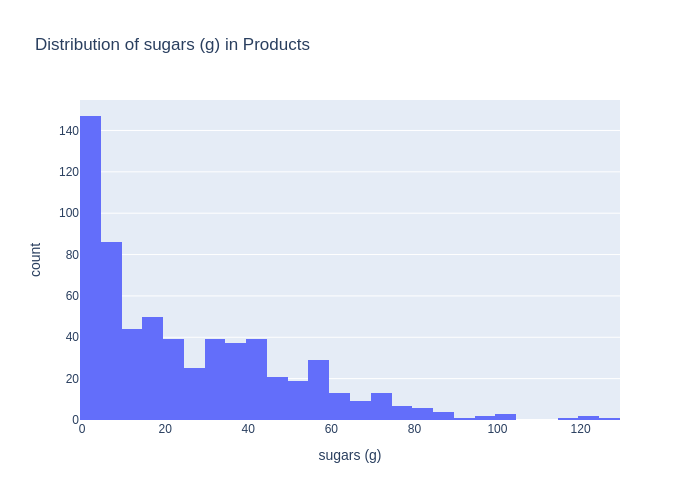

In [53]:
fig = px.histogram(df, x='sugars (g)', title='Distribution of sugars (g) in Products')

fig.show(renderer = 'png')

There are 3 main things to note about this distribution, if we first take a look at the bars closest to 0, we see that once again a portion of the data has very low sugar, this is probably caused by products who are not sugary but infact salty or some other palatte/appetite focused good. 

The second main thing that is interesting is how over-sugary some of these products are. A quick google search will show that most adults do not need more than 30 grams of sugar per day. The mean in this case is 25 grams, which is higher than the median but can be explained by the fact that this is once again a right skewed distribution, which is close to the 30 grams but keep in mind this is per portion or serving size, meaning that just 2 of these portions, on average the consumer would have eaten more sugar than the healthy intake of sugar recommended by doctors.

The third main thing which I found interesting, is how the variance is just a bit more even than what we saw with the sodium distribution. Here we see that after the first bar, all the data from the middle of bin 0-20 to 60, the count of each bin is equal, highlighting that although the intial assumption is that a large portion of the goods seem to have lower sugar, in reality it is far more centralized around unhealthy levels of sugar content per serving.

**Third Aspect of Data:**

Finally, lets take a look at cholestrol in the same process as we did the above 2 analyses.

In [56]:
print("Mean: ", df['cholesterol (mg)'].mean())
print("Median: ", df['cholesterol (mg)'].median())
print("Mode: ", df['cholesterol (mg)'].mode())

Mean:  44.95290423861852
Median:  34.0
Mode:  0    0.0
Name: cholesterol (mg), dtype: float64


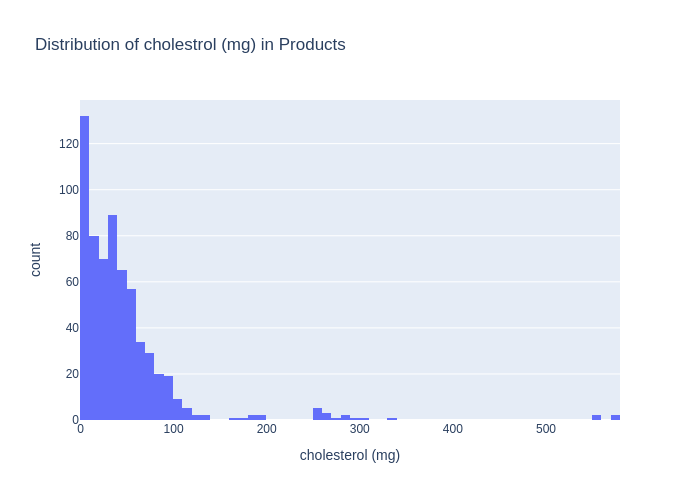

In [57]:
fig = px.histogram(df, x='cholesterol (mg)', title='Distribution of cholestrol (mg) in Products')

fig.show(renderer = 'png')

Because the histogram is a bit unclear, we can look at this data through the lens of a box-whisker plot to see whats happening in the first bin between 0-100.

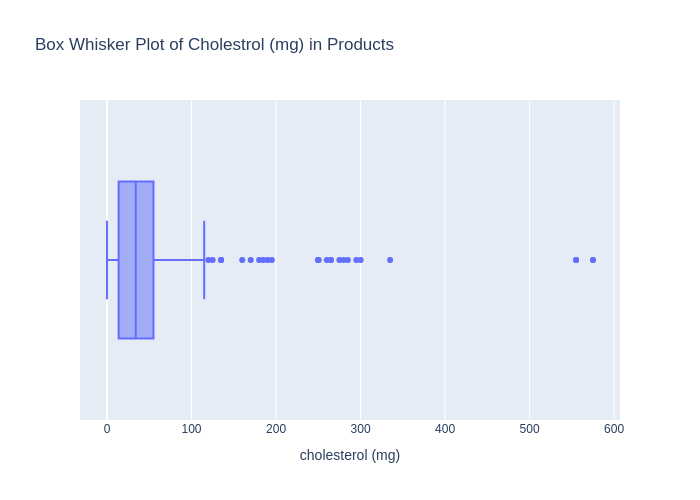

In [58]:
fig = px.box(df, x='cholesterol (mg)', title='Box Whisker Plot of Cholestrol (mg) in Products')

fig.show(renderer = 'png')

There are 2 main interesting things to point out, the size of the third quartile and the number of outliers. As seen above, we know this is once again a right skewed distribution meaning the mean should be greater than the median (it is), but whats interesting is how wide the spread of values exist, causing the histogram to be so compressed. This is why we use the box whisker plot to talk about the first interesting aspect, the outliers.

The outliers are so numerous that it drags the mean immensly, highlighting how frequent foods with high cholestrol seem to have (and once again this just per serving/portion). This is an interesting phenomenon as despite how unhealthy these high cholestrol foods are, they are still put on the market for consumption. Furthermore, the mean is pulled even further to the right by the sheer amount of data points that exist between Q3 and Q4, which is the second interesting aspect of this data set.

We can see that between Q3 and Q4 (or the max value), this range of values greatly outnumbers all the quartiles up to it highlighting how much cholestrol exists in each one of these portions. Furthermore with this insight, we can return back to our original histogram and see how if we were to adjust or edit the bin size, we would see a centralized distribution close to the values close or greater than the median.

# Question 7

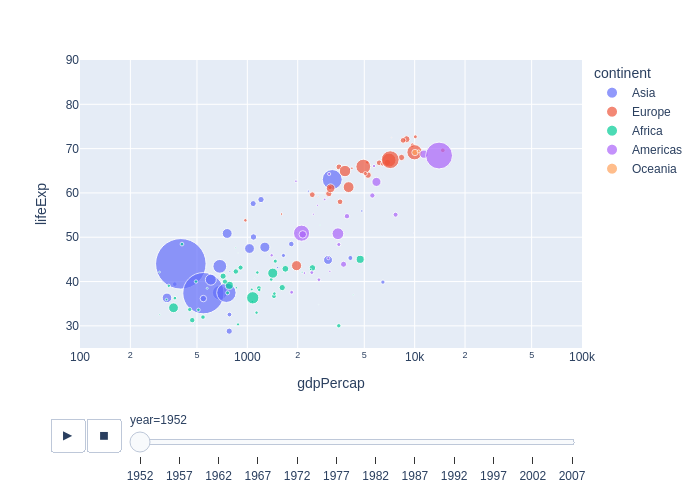

In [61]:
#Recreated plotly code

import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show(renderer = 'png')

# Question 8

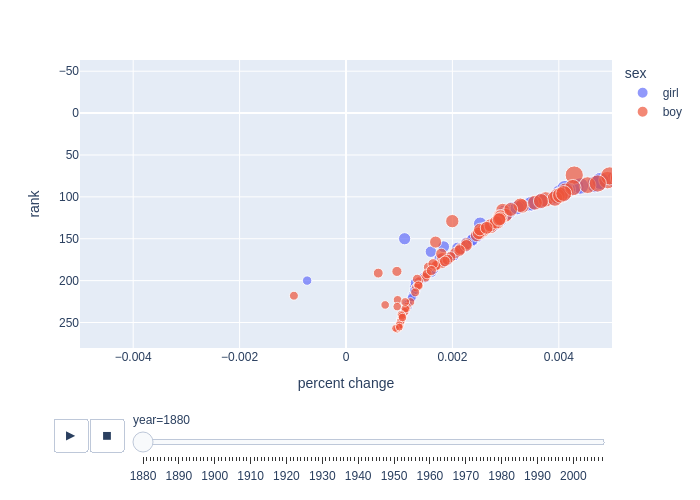

In [62]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Chat logs for Q5-8: https://chatgpt.com/share/66f559e3-684c-8007-a530-f054eff925a5

# Question 9

Yes.